In [6]:
import os

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split

from datasets import load_from_disk
from create_data import download_and_save_dataset

from config import (
    DATASET_PATH, 
    DEVICE, 
    OUTPUT_DIR, 
    BATCH_SIZE, 
    NUM_EPOCHS, 
    LEARNING_RATE, 
    MAX_LENGTH, 
    TARGET_SAMPLE_RATE)
from heplers.audio_dataset import AudioDataset
from heplers.audio_cnn import AudioCNN
from heplers.audio_trainer import ModelTrainer
from heplers.result_visualizer import ResultVisualizer

In [7]:
# Sprawdź czy folder data istnieje i załaduj dataset
if os.path.exists(DATASET_PATH):
    try:
        print("Ładowanie datasetu z dysku...")
        dataset = load_from_disk(DATASET_PATH)
    except Exception as e:
        print(f"Błąd podczas ładowania datasetu: {e}")
        print("Pobieranie datasetu ponownie...")
        dataset = download_and_save_dataset()
else:
    print("Folder 'data' nie istnieje. Pobieranie datasetu...")
    dataset = download_and_save_dataset()

Ładowanie datasetu z dysku...


Using device: cpu
Output directory: model_outputs
Available splits in dataset: dict_keys(['train'])
Total dataset size: 4481
Train size: 3136, Validation size: 672, Test size: 673
AudioCNN(
  (conv1): Conv1d(1, 32, kernel_size=(5,), stride=(1,), padding=(2,))
  (bn1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv1d(32, 64, kernel_size=(3,), stride=(1,), padding=(1,))
  (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv1d(64, 128, kernel_size=(3,), stride=(1,), padding=(1,))
  (bn3): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool3): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv1d(128, 256, kernel_size=(3,), stride=(1,), padding=(1,)

Epoch 1/30: 100%|██████████| 98/98 [07:22<00:00,  4.51s/it, loss=7.33, acc=0.35] 


Epoch 1/30 - Train Loss: 9.0954, Train Acc: 0.3501, Val Loss: 15.8397, Val Acc: 0.3661
Model saved with validation accuracy: 0.3661 to model_outputs\best_audio_emotion_model.pth


Epoch 2/30: 100%|██████████| 98/98 [07:39<00:00,  4.68s/it, loss=6.08, acc=0.428]


Epoch 2/30 - Train Loss: 6.7346, Train Acc: 0.4276, Val Loss: 7.6359, Val Acc: 0.3720
Model saved with validation accuracy: 0.3720 to model_outputs\best_audio_emotion_model.pth


Epoch 3/30: 100%|██████████| 98/98 [09:27<00:00,  5.79s/it, loss=6.17, acc=0.472]


Epoch 3/30 - Train Loss: 5.6356, Train Acc: 0.4719, Val Loss: 9.6258, Val Acc: 0.4167
Model saved with validation accuracy: 0.4167 to model_outputs\best_audio_emotion_model.pth


Epoch 4/30: 100%|██████████| 98/98 [09:06<00:00,  5.58s/it, loss=5.07, acc=0.496]


Epoch 4/30 - Train Loss: 4.9724, Train Acc: 0.4955, Val Loss: 9.6276, Val Acc: 0.2902


Epoch 5/30: 100%|██████████| 98/98 [05:49<00:00,  3.56s/it, loss=3.68, acc=0.525]


Epoch 5/30 - Train Loss: 4.6391, Train Acc: 0.5252, Val Loss: 4.6329, Val Acc: 0.4583
Model saved with validation accuracy: 0.4583 to model_outputs\best_audio_emotion_model.pth


Epoch 6/30: 100%|██████████| 98/98 [06:43<00:00,  4.12s/it, loss=3.3, acc=0.523] 


Epoch 6/30 - Train Loss: 4.0335, Train Acc: 0.5233, Val Loss: 4.5859, Val Acc: 0.4658
Model saved with validation accuracy: 0.4658 to model_outputs\best_audio_emotion_model.pth


Epoch 7/30: 100%|██████████| 98/98 [05:28<00:00,  3.35s/it, loss=3.07, acc=0.545]


Epoch 7/30 - Train Loss: 3.5162, Train Acc: 0.5450, Val Loss: 8.0762, Val Acc: 0.3765


Epoch 8/30: 100%|██████████| 98/98 [04:59<00:00,  3.05s/it, loss=0.799, acc=0.573]


Epoch 8/30 - Train Loss: 3.1997, Train Acc: 0.5727, Val Loss: 6.3125, Val Acc: 0.4554


Epoch 9/30: 100%|██████████| 98/98 [05:01<00:00,  3.07s/it, loss=2.53, acc=0.588]


Epoch 9/30 - Train Loss: 2.7865, Train Acc: 0.5880, Val Loss: 2.3112, Val Acc: 0.6295
Model saved with validation accuracy: 0.6295 to model_outputs\best_audio_emotion_model.pth


Epoch 10/30: 100%|██████████| 98/98 [04:42<00:00,  2.88s/it, loss=2.83, acc=0.612] 


Epoch 10/30 - Train Loss: 2.5345, Train Acc: 0.6119, Val Loss: 4.8857, Val Acc: 0.3869


Epoch 11/30: 100%|██████████| 98/98 [04:39<00:00,  2.85s/it, loss=1.15, acc=0.618] 


Epoch 11/30 - Train Loss: 2.4076, Train Acc: 0.6180, Val Loss: 4.9659, Val Acc: 0.4688


Epoch 12/30: 100%|██████████| 98/98 [05:53<00:00,  3.61s/it, loss=3.95, acc=0.609] 


Epoch 12/30 - Train Loss: 2.1835, Train Acc: 0.6094, Val Loss: 1.8713, Val Acc: 0.5982


Epoch 13/30: 100%|██████████| 98/98 [04:44<00:00,  2.90s/it, loss=2.27, acc=0.65]  


Epoch 13/30 - Train Loss: 1.8231, Train Acc: 0.6502, Val Loss: 4.1114, Val Acc: 0.4256


Epoch 14/30: 100%|██████████| 98/98 [05:29<00:00,  3.37s/it, loss=2.08, acc=0.638] 


Epoch 14/30 - Train Loss: 1.8709, Train Acc: 0.6384, Val Loss: 1.6640, Val Acc: 0.6101


Epoch 15/30: 100%|██████████| 98/98 [05:47<00:00,  3.54s/it, loss=0.966, acc=0.665]


Epoch 15/30 - Train Loss: 1.6139, Train Acc: 0.6652, Val Loss: 2.0718, Val Acc: 0.5551


Epoch 16/30: 100%|██████████| 98/98 [05:06<00:00,  3.12s/it, loss=1.92, acc=0.672] 


Epoch 16/30 - Train Loss: 1.5675, Train Acc: 0.6716, Val Loss: 2.0003, Val Acc: 0.6369
Model saved with validation accuracy: 0.6369 to model_outputs\best_audio_emotion_model.pth


Epoch 17/30: 100%|██████████| 98/98 [05:12<00:00,  3.19s/it, loss=2.44, acc=0.679] 


Epoch 17/30 - Train Loss: 1.4401, Train Acc: 0.6792, Val Loss: 2.1976, Val Acc: 0.6652
Model saved with validation accuracy: 0.6652 to model_outputs\best_audio_emotion_model.pth


Epoch 18/30: 100%|██████████| 98/98 [05:12<00:00,  3.19s/it, loss=1.34, acc=0.695] 


Epoch 18/30 - Train Loss: 1.2916, Train Acc: 0.6945, Val Loss: 1.8379, Val Acc: 0.5387


Epoch 19/30: 100%|██████████| 98/98 [05:06<00:00,  3.13s/it, loss=0.69, acc=0.701] 


Epoch 19/30 - Train Loss: 1.1484, Train Acc: 0.7006, Val Loss: 0.9081, Val Acc: 0.7321
Model saved with validation accuracy: 0.7321 to model_outputs\best_audio_emotion_model.pth


Epoch 20/30: 100%|██████████| 98/98 [05:15<00:00,  3.22s/it, loss=1.3, acc=0.723]  


Epoch 20/30 - Train Loss: 1.0252, Train Acc: 0.7226, Val Loss: 1.4674, Val Acc: 0.6205


Epoch 21/30: 100%|██████████| 98/98 [05:05<00:00,  3.11s/it, loss=0.464, acc=0.739]


Epoch 21/30 - Train Loss: 0.9562, Train Acc: 0.7392, Val Loss: 0.8901, Val Acc: 0.7247


Epoch 22/30: 100%|██████████| 98/98 [05:15<00:00,  3.22s/it, loss=1.54, acc=0.757] 


Epoch 22/30 - Train Loss: 0.8786, Train Acc: 0.7567, Val Loss: 1.0258, Val Acc: 0.7113


Epoch 23/30: 100%|██████████| 98/98 [05:31<00:00,  3.39s/it, loss=0.471, acc=0.766]


Epoch 23/30 - Train Loss: 0.8467, Train Acc: 0.7663, Val Loss: 0.9135, Val Acc: 0.7723
Model saved with validation accuracy: 0.7723 to model_outputs\best_audio_emotion_model.pth


Epoch 24/30: 100%|██████████| 98/98 [04:44<00:00,  2.91s/it, loss=0.631, acc=0.77] 


Epoch 24/30 - Train Loss: 0.7808, Train Acc: 0.7698, Val Loss: 1.6202, Val Acc: 0.6101


Epoch 25/30: 100%|██████████| 98/98 [04:44<00:00,  2.90s/it, loss=0.883, acc=0.756]


Epoch 25/30 - Train Loss: 0.8941, Train Acc: 0.7564, Val Loss: 2.2773, Val Acc: 0.5164


Epoch 26/30: 100%|██████████| 98/98 [04:32<00:00,  2.78s/it, loss=1.77, acc=0.79]  


Epoch 26/30 - Train Loss: 0.7351, Train Acc: 0.7902, Val Loss: 0.7800, Val Acc: 0.7991
Model saved with validation accuracy: 0.7991 to model_outputs\best_audio_emotion_model.pth


Epoch 27/30: 100%|██████████| 98/98 [04:32<00:00,  2.78s/it, loss=0.944, acc=0.793]


Epoch 27/30 - Train Loss: 0.6668, Train Acc: 0.7927, Val Loss: 0.6718, Val Acc: 0.8036
Model saved with validation accuracy: 0.8036 to model_outputs\best_audio_emotion_model.pth


Epoch 28/30: 100%|██████████| 98/98 [04:26<00:00,  2.72s/it, loss=0.288, acc=0.806]


Epoch 28/30 - Train Loss: 0.6696, Train Acc: 0.8058, Val Loss: 0.6867, Val Acc: 0.8021


Epoch 29/30: 100%|██████████| 98/98 [04:33<00:00,  2.79s/it, loss=0.371, acc=0.811]


Epoch 29/30 - Train Loss: 0.6265, Train Acc: 0.8106, Val Loss: 0.8668, Val Acc: 0.7589


Epoch 30/30: 100%|██████████| 98/98 [04:41<00:00,  2.87s/it, loss=0.426, acc=0.812]


Epoch 30/30 - Train Loss: 0.6449, Train Acc: 0.8115, Val Loss: 0.6110, Val Acc: 0.8155
Model saved with validation accuracy: 0.8155 to model_outputs\best_audio_emotion_model.pth
Loaded best model from model_outputs\best_audio_emotion_model.pth
Test Loss: 0.4656, Test Accuracy: 0.8276
Wyniki będą zapisywane w katalogu: c:\Users\kubas\Desktop\Projekt dyplomowy\Audio-Emotion-Recognition\model_outputs


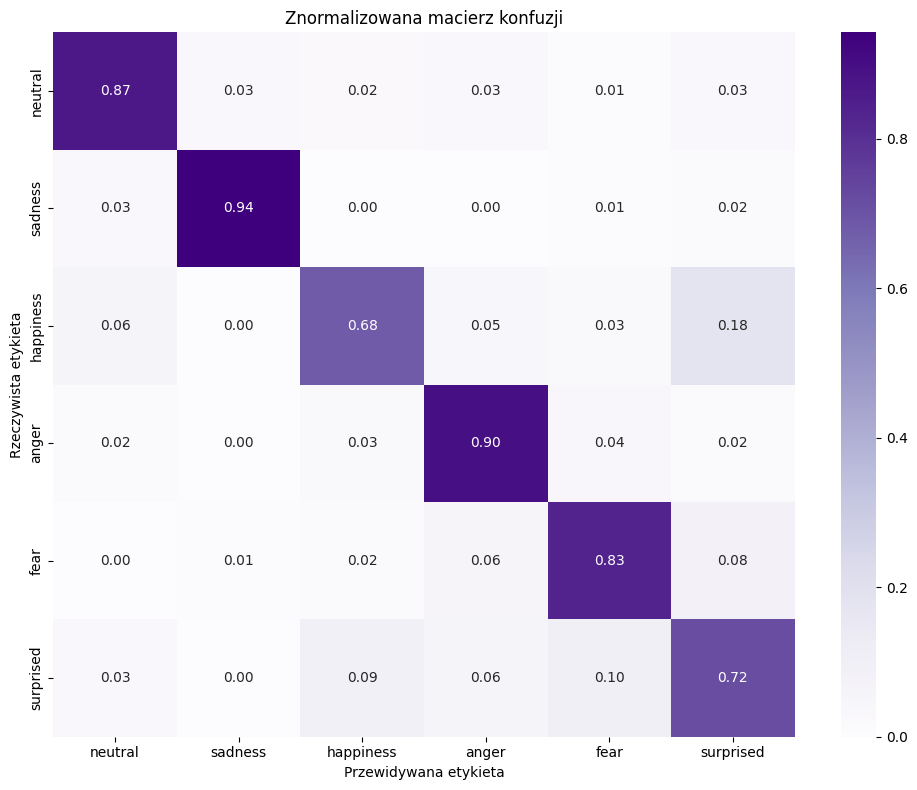


Classification Report:
              precision    recall  f1-score   support

     neutral       0.87      0.87      0.87       121
     sadness       0.96      0.94      0.95       121
   happiness       0.81      0.68      0.74       109
       anger       0.83      0.90      0.86       116
        fear       0.82      0.83      0.82       107
   surprised       0.66      0.72      0.69        99

    accuracy                           0.83       673
   macro avg       0.82      0.82      0.82       673
weighted avg       0.83      0.83      0.83       673

Zapisano raport klasyfikacji do: model_outputs\classification_report.json


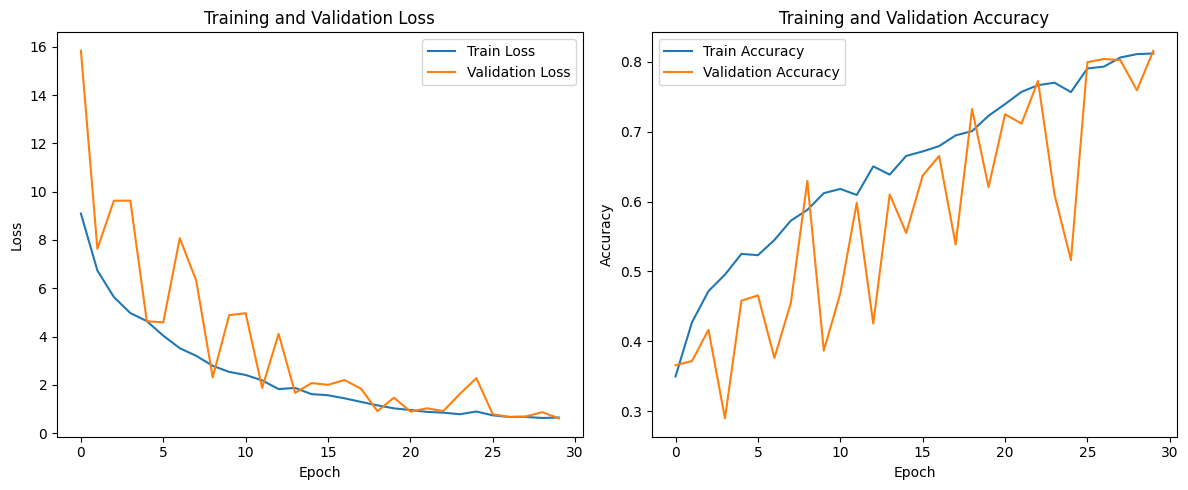

Zapisano podsumowanie modelu do: model_outputs\model_summary.json
Wyniki zostały zapisane w katalogu: c:\Users\kubas\Desktop\Projekt dyplomowy\Audio-Emotion-Recognition\model_outputs


In [8]:
print(f"Using device: {DEVICE}")
print(f"Output directory: {OUTPUT_DIR}")

# Sprawdzenie dostępnych kluczy (splitów) w zbiorze danych
print(f"Available splits in dataset: {dataset.keys()}")
# Przygotowanie zbiorów danych
full_dataset = dataset["train"]  # W tym przypadku mamy tylko zbiór treningowy

# Określamy rozmiary zbiorów
dataset_size = len(full_dataset)
train_size = int(0.7 * dataset_size)
val_size = int(0.15 * dataset_size)
test_size = dataset_size - train_size - val_size

print(f"Total dataset size: {dataset_size}")
print(f"Train size: {train_size}, Validation size: {val_size}, Test size: {test_size}")

# Dzielimy zbiór na części
train_subset, val_subset, test_subset = random_split(
    full_dataset, [train_size, val_size, test_size],
    generator=torch.Generator().manual_seed(42)  # Dla powtarzalności
)

# Tworzymy właściwe zbiory danych z augmentacją dla zbioru treningowego
train_dataset = AudioDataset(train_subset, max_length=MAX_LENGTH, 
                            sample_rate=TARGET_SAMPLE_RATE, augment=True)
val_dataset = AudioDataset(val_subset, max_length=MAX_LENGTH, 
                            sample_rate=TARGET_SAMPLE_RATE, augment=False)
test_dataset = AudioDataset(test_subset, max_length=MAX_LENGTH, 
                            sample_rate=TARGET_SAMPLE_RATE, augment=False)

# Tworzenie data loaderów
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, 
                        shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, 
                    shuffle=False, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, 
                    shuffle=False, num_workers=0)

# Inicjalizacja modelu
model = AudioCNN(num_classes=6)

# Wypisanie struktury modelu
print(model)

# Inicjalizacja wag modelu
model.initialize_weights()

# Obliczenie wag dla loss function
class_counts = torch.zeros(6)
for _, label in train_dataset:
    class_counts[label] += 1

# Obliczenie wag dla loss function
class_weights = 1.0 / (class_counts + 1e-6)  # Małe epsilon aby uniknąć dzielenia przez zero
class_weights = class_weights / class_weights.sum() * len(class_weights)  # Normalizacja
class_weights = class_weights.to(DEVICE)

criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.AdamW(model.parameters(), lr=LEARNING_RATE, weight_decay=1e-5)

# Inicjalizacja trainera z określonym katalogiem wyjściowym
trainer = ModelTrainer(model, criterion, optimizer, device=DEVICE, output_dir=OUTPUT_DIR)

# Dodanie schedulera
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.5, patience=3, verbose=True
)
trainer.setup_scheduler(scheduler)

# Trenowanie modelu
history = trainer.train_model(
    train_loader, 
    val_loader, 
    num_epochs=NUM_EPOCHS, 
    patience=7  # Early stopping po 7 epokach bez poprawy
)

# Wczytanie najlepszego modelu
trainer.load_best_model()

# Ewaluacja na zbiorze testowym
test_loss, test_acc = trainer.evaluate_model(test_loader)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

# Generowanie szczegółowego raportu
all_labels, all_preds = trainer.get_predictions(test_loader)

# Etykiety klas
class_names = ["neutral", "sadness", "happiness", "anger", "fear", "surprised"]

# Inicjalizacja wizualizatora z określonym katalogiem wyjściowym
visualizer = ResultVisualizer(output_dir=OUTPUT_DIR)

# Macierz pomyłek (tylko znormalizowana)
visualizer.plot_confusion_matrix(all_labels, all_preds, class_names)

# Raport klasyfikacji
visualizer.print_classification_report(all_labels, all_preds, class_names)

# Wizualizacja historii treningu
visualizer.plot_training_history(history)

# Zapisz podsumowanie modelu
visualizer.save_model_summary(model, test_loss, test_acc)

print(f"Wyniki zostały zapisane w katalogu: {os.path.abspath(OUTPUT_DIR)}")